# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [ ]:
#!pip install gymnasium
!pip install gymnasium[classic-control]
import gymnasium as gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

seed=0
np.random.seed(seed)

In [88]:
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

### 2. Define the Policy

In [61]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
print('observation space:', env.observation_space)
print('action space:', env.action_space)

class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4*np.random.rand(s_size, a_size)  # weights for simple linear policy: state_space x action_space
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state):
        probs = self.forward(state)
        #action = np.random.choice(2, p=probs) # option 1: stochastic policy
        action = np.argmax(probs)              # option 2: deterministic policy
        return action

observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space: Discrete(2)


In [ ]:
state, info = env.reset(seed=0)
plt.imshow(env.render())
action = policy.act(state)
state, reward, done, truncated, info = env.step(action)
r = np.dot(state, policy.w)
r == reward

### 3. Train the Agent with Stochastic Policy Search

In [ ]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
policy = Policy()

In [110]:
def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2, render=False):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    skip_view = 25
    for i_episode in range(1, n_episodes+1):
        rewards = []
        obs, info = env.reset(seed=seed)
        img = plt.imshow(env.render())
        for t in range(max_t):
            action = policy.act(obs)
            obs, reward, done, truncated, info = env.step(action)
            rewards.append(reward)
            if render and i_episode % skip_view == 0.:
                img.set_data(env.render())
                plt.axis('off')
                display.display(plt.gcf())
                display.clear_output(wait=True)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            policy.w = best_w
            break
        
    return scores
            
#scores = hill_climbing()

In [ ]:
#policy = Policy()
scores = hill_climbing(n_episodes=500, max_t=500, gamma=0.9995, print_every=50, noise_scale=1e-2, render=False)

### 4. Plot the Scores

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

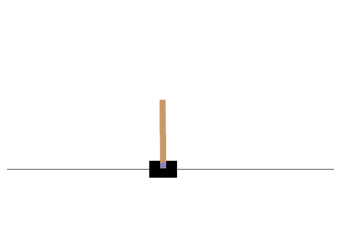

In [113]:
polly=policy#Policy()
#for i in range(50):
state, info = env.reset(seed=seed)
img = plt.imshow(env.render())#[0])    
for j in range(500):
    action = polly.act(state)
    state, reward, done, _, info = env.step(action)
    img.set_data(env.render())#[0]) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if done:
        break 